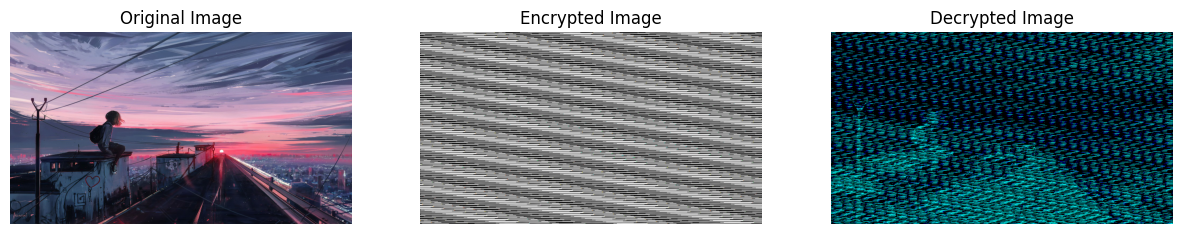

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lorenz chaotic system equations
def lorenz(x, y, z, dt, sigma=10, rho=28, beta=8/3):
    x_dot = sigma * (y - x)
    y_dot = x * (rho - z) - y
    z_dot = x * y - beta * z
    return x + (x_dot * dt), y + (y_dot * dt), z + (z_dot * dt)

# Generate chaotic sequence using Lorenz system
def generate_chaotic_sequence(x0, y0, z0, num_steps, dt):
    x, y, z = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    x[0], y[0], z[0] = x0, y0, z0
    for i in range(1, num_steps):
        x[i], y[i], z[i] = lorenz(x[i-1], y[i-1], z[i-1], dt)
    return x, y, z

# Encrypt image using chaotic sequence
def encrypt_image(image, chaotic_sequence):
    flattened_sequence = np.ravel(chaotic_sequence)
    encrypted_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                encrypted_image[i, j, k] = (image[i, j, k] + flattened_sequence[(i * image.shape[1] + j) % len(flattened_sequence)]) % 256
    return encrypted_image

# Decrypt image using chaotic sequence
def decrypt_image(encrypted_image, chaotic_sequence):
    flattened_sequence = np.ravel(chaotic_sequence)
    decrypted_image = np.zeros_like(encrypted_image)
    for i in range(encrypted_image.shape[0]):
        for j in range(encrypted_image.shape[1]):
            for k in range(encrypted_image.shape[2]):
                decrypted_image[i, j, k] = (encrypted_image[i, j, k] - flattened_sequence[(i * encrypted_image.shape[1] + j + k) % len(flattened_sequence)]) % 256
    return decrypted_image



if __name__ == '__main__':
    # Load image
    img = mpimg.imread("trial.png")

    # Parameters for Lorenz system
    x0, y0, z0 = 0, 1, 1.05
    num_steps = 1000
    dt = 0.01

    # Generate chaotic sequence
    chaotic_sequence = generate_chaotic_sequence(x0, y0, z0, num_steps, dt)

    # Encrypt image
    encrypted_image = encrypt_image(img, chaotic_sequence)

    # Decrypt image
    decrypted_image = decrypt_image(encrypted_image, chaotic_sequence)

    # Display original, encrypted, and decrypted images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(encrypted_image.astype(np.uint8))
    axs[1].set_title('Encrypted Image')
    axs[1].axis('off')
    axs[2].imshow(decrypted_image.astype(np.uint8))
    axs[2].set_title('Decrypted Image')
    axs[2].axis('off')
    plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

def entropy(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Compute histogram
    hist, _ = np.histogram(gray_image.flatten(), bins=256, range=(0, 1))

    # Calculate probability distribution
    prob = hist / np.sum(hist)

    # Compute entropy
    entropy_val = -np.sum(prob * np.log2(prob + 1e-10))  # Add a small value to avoid log(0)

    return entropy_val

if __name__ == '__main__':
   

    # Calculate entropy
    entropy_encrypted = entropy(encrypted_image)
    entropy_decrypted = entropy(decrypted_image)

    print("Entropy of encrypted image:", entropy_encrypted)
    print("Entropy of decrypted image:", entropy_decrypted)


Entropy of encrypted image: 7.8585036577754686
Entropy of decrypted image: 7.870625304905739


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

def mse(image1, image2):
    # Calculate the Mean Squared Error (MSE) between two images
    return np.mean((image1 - image2) ** 2)

if __name__ == '__main__':
   
    # Calculate MSE between encrypted and decrypted images
    mse_value = mse(encrypted_image, decrypted_image)

    print("Mean Squared Error (MSE) between encrypted and decrypted images:", mse_value)


Mean Squared Error (MSE) between encrypted and decrypted images: 31919.953


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

def mse(image1, image2):
    # Calculate the Mean Squared Error (MSE) between two images
    return np.mean((image1 - image2) ** 2)

def psnr(image1, image2):
    max_pixel = 255.0  # Maximum possible pixel value
    mse_value = mse(image1, image2)
    return 10 * np.log10((max_pixel ** 2) / mse_value)

if __name__ == '__main__':
   
    # Calculate PSNR between encrypted and decrypted images
    psnr_value = psnr(encrypted_image, decrypted_image)

    print("Peak Signal-to-Noise Ratio (PSNR) between encrypted and decrypted images:", psnr_value)


Peak Signal-to-Noise Ratio (PSNR) between encrypted and decrypted images: 3.090181159576642


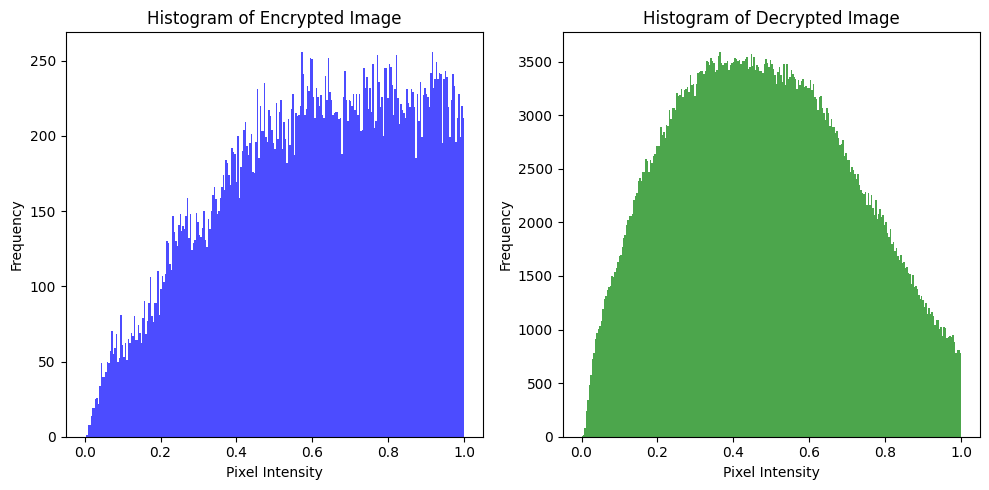

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

if __name__ == '__main__':
   

    # Convert the images to grayscale
    encrypted_gray = color.rgb2gray(encrypted_image)
    decrypted_gray = color.rgb2gray(decrypted_image)

    # Plot histograms
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(encrypted_gray.flatten(), bins=256, range=(0, 1), color='blue', alpha=0.7)
    plt.title('Histogram of Encrypted Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(decrypted_gray.flatten(), bins=256, range=(0, 1), color='green', alpha=0.7)
    plt.title('Histogram of Decrypted Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [24]:
import numpy as np
from scipy.stats import pearsonr

def correlation(image1, image2):
    # Flatten the images
    flattened_image1 = image1.flatten()
    flattened_image2 = image2.flatten()
    
    # Calculate Pearson correlation coefficient
    corr_coef, _ = pearsonr(flattened_image1, flattened_image2)
    
    return corr_coef

# Example usage
if __name__ == '__main__':
    

    # Calculate correlation coefficient
    corr = correlation(encrypted_image, decrypted_image)
    print("Correlation coefficient:", corr)



Correlation coefficient: -0.059516309130459764
